<a href="https://colab.research.google.com/github/veillette/jupyterNotebooks/blob/main/Advanced%20Lab/PeakFitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Peak Analysis

This notebook demonstrates how to perform peak analysis on experimental data by fitting a model function (sum of Gaussians) to the data using least squares regression. It generates mock data with four peaks, fits the model to extract peak parameters (center, width, height), and visualizes the results.


Let's try to create some mock data for four peaks. In practice you should import the data instead

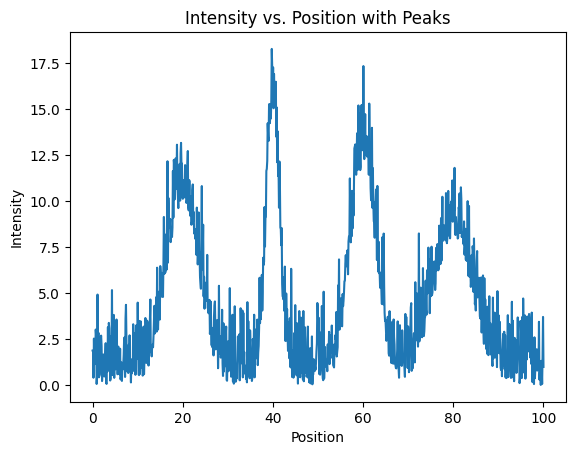

In [30]:

import numpy as np
import matplotlib.pyplot as plt

# Generate x-axis data (position)
x = np.linspace(0, 100, 1000)

# Define parameters for the Gaussian peaks
peak_centers = [20, 40, 60, 80]
peak_widths = [5, 2, 4, 6]
peak_heights = [10, 15, 12, 8]

# Initialize intensity data
intensity = np.zeros_like(x)

# Generate Gaussian peaks with noise
for center, width, height in zip(peak_centers, peak_widths, peak_heights):
  gaussian = height * np.exp(-((x - center) / width)**2)
  intensity += gaussian

# Add some random noise
noise = np.abs(2*np.random.normal(0, 1, len(x)))
intensity += noise

# Plot the data
plt.plot(x, intensity)
plt.xlabel("Position")
plt.ylabel("Intensity")
plt.title("Intensity vs. Position with Peaks")
plt.show()


In [31]:
# the function that will be used for the least square regression.
# Note the order of the parameters in the function. The optimized values from the curve fit
# will be in the same order as defined in this function.

def experimentalIntensityPattern(x, peak_center1, peak_width1, peak_height1, peak_center2, peak_width2,
                                 peak_height2, peak_center3, peak_width3, peak_height3,peak_center4, peak_width4, peak_height4, background):


    def gaussian(x, center, width, height):
        return height * np.exp(-((x - center) / width)**2);

    intensity= gaussian(x, peak_center1, peak_width1, peak_height1) +    gaussian(x, peak_center2, peak_width2, peak_height2) +  gaussian(x, peak_center3, peak_width3, peak_height3) +     gaussian(x, peak_center4, peak_width4, peak_height4) + background

    return intensity;


In [32]:
from scipy.optimize import curve_fit  # Import the 'curve_fit' function from scipy.optimize.

# give some initial values to our parameters
# The order of parameters in the list is:
# [peak_center1, peak_width1, peak_height1, peak_center2, peak_width2, peak_height2,
# peak_center3, peak_width3, peak_height3, peak_center4, peak_width4, peak_height4, background]
initial_params= [18,5,10,42,6,13,57,4,12,78,6,10,1]

# Perform the least squares fit using curve_fit
# experimentalIntensityPattern: The function to fit to the data
# x: The independent variable (position)
# intensity: The dependent variable (intensity)
# p0: Initial guess for the parameters
# params: Optimized values for the parameters
# covariance: The estimated covariance of params
params, covariance = curve_fit(experimentalIntensityPattern, x, intensity, p0=initial_params)

# Extract the optimized parameters from the params array
peak_center1, peak_width1, peak_height1, peak_center2, peak_width2, peak_height2, peak_center3, peak_width3, peak_height3,peak_center4, peak_width4, peak_height4, background = params

# Calculate the standard deviation of the parameters
peak_center1_std, peak_width1_std, peak_height1_std, peak_center2_std, peak_width2_std, peak_height2_std, peak_center3_std, peak_width3_std, peak_height3_std,peak_center4_std, peak_width4_std, peak_height4_std, background_std  = np.sqrt(np.diag(covariance))

# Display the optimized parameters and their standard deviations
print("Optimized parameters:")
print(f"background = {background} ± {background_std}")
print(f"peak_center_1 = {peak_center1} ± {peak_center1_std}")
print(f"peak_width_1 = {peak_width1} ± {peak_width1_std}")
print(f"peak_height_1 = {peak_height1} ± {peak_height1_std}")
print(f"peak_center_2 = {peak_center2} ± {peak_center2_std}")
print(f"peak_width_2 = {peak_width2} ± {peak_width2_std}")
print(f"peak_height_2 = {peak_height2} ± {peak_height2_std}")
print(f"peak_center_3 = {peak_center3} ± {peak_center3_std}")
print(f"peak_width_3 = {peak_width3} ± {peak_width3_std}")
print(f"peak_height_3 = {peak_height3} ± {peak_height3_std}")
print(f"peak_center_4 = {peak_center4} ± {peak_center4_std}")
print(f"peak_width_4 = {peak_width4} ± {peak_width4_std}")
print(f"peak_height_4 = {peak_height4} ± {peak_height4_std}")

Optimized parameters:
background = 1.610906583203538 ± 0.0622653031107899
peak_center_1 = 19.949270121679458 ± 0.07621204169142047
peak_width_1 = 4.946657356572559 ± 0.11652082950251613
peak_height_1 = 9.836803613250726 ± 0.19076053285432426
peak_center_2 = 39.967600360289374 ± 0.03178083342427699
peak_width_2 = 2.013047539208161 ± 0.04646238320003715
peak_height_2 = 15.047862608163868 ± 0.29427289196567413
peak_center_3 = 59.99687755663593 ± 0.053445139220051605
peak_width_3 = 3.823780466798491 ± 0.07994129466741251
peak_height_3 = 12.335770635858843 ± 0.21599932549009576
peak_center_4 = 80.0329604636428 ± 0.1106175151542838
peak_width_4 = 6.236349033415813 ± 0.17133379930888315
peak_height_4 = 7.610413259348828 ± 0.1714648053514981


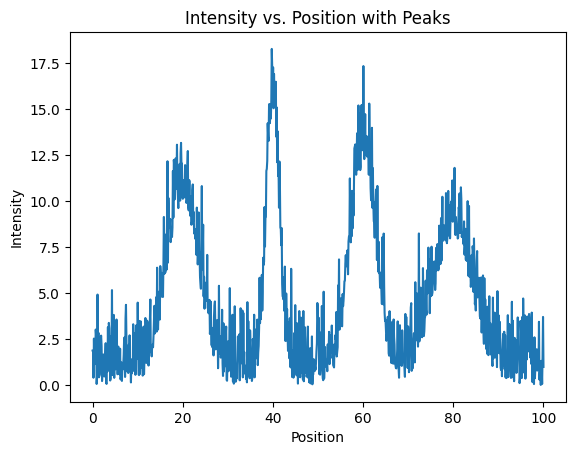

In [33]:
# Plot the data
plt
plt.plot(x, intensity)
plt.xlabel("Position")
plt.ylabel("Intensity")
plt.title("Intensity vs. Position with Peaks")
plt.show()

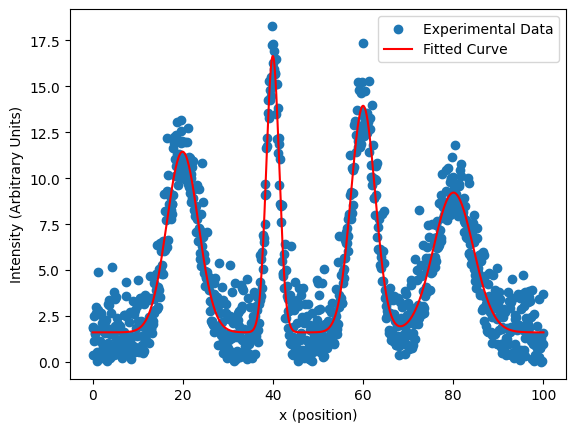

In [34]:

# Plot the experimental data as scatter points
plt.scatter(x, intensity, label='Experimental Data')

# Generate a linear x-axis for the fitted curve
linear_x = np.linspace(x.min(), x.max(), 1000)

# Calculate the fitted intensity values using the optimized parameters
y_fit = experimentalIntensityPattern(linear_x, peak_center1, peak_width1, peak_height1, peak_center2, peak_width2, peak_height2, peak_center3, peak_width3, peak_height3,peak_center4, peak_width4, peak_height4, background)

# Plot the fitted curve as a red line
plt.plot(linear_x, y_fit, 'r-', label='Fitted Curve')

plt.xlabel('x (position)')
plt.ylabel('Intensity (Arbitrary Units)')
plt.legend()
plt.show()